In [18]:
import numpy as np
from scipy.misc import imread, imsave
from scipy.linalg import svd
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.util import img_as_bool

from matplotlib import pyplot as plt

%matplotlib inline

float number needed is: 23400
Number of principle components needed is: 39
nbytes: 93600


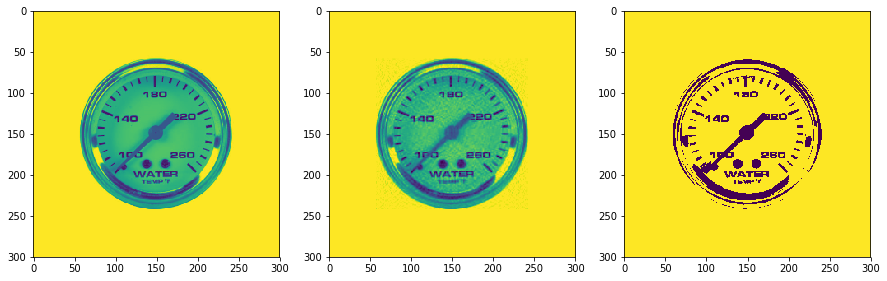

In [37]:
data = imread("data/sample_2.png")
data = rgb2gray(data)
data = resize(data, (300, 300))

def reconstruct_img(data, compress_rate):
    data_binary = img_as_bool(data)
    
    recon = np.zeros(data.shape)

    percent = compress_rate
    full = np.prod(data.shape)
    partial = int(full * percent)
    print "float number needed is:", partial
    pcs = int(partial / np.sum(data.shape))
    print "Number of principle components needed is:", pcs

    U, S, Vh = svd(data, full_matrices=False)
    layer = np.dot(np.dot(U[:, :pcs], np.diag(S[:pcs])), Vh[:pcs, :])
    recon = layer
    
    print "nbytes:", U[:, :pcs].nbytes
    
    fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
    axarr[0].imshow(data, vmin=0., vmax=1.)
    axarr[1].imshow(recon, vmin=0., vmax=1.)
    axarr[2].imshow(data_binary, vmin=0., vmax=1.)
    plt.show()
    
reconstruct_img(data, 0.26)